In [1]:
#!pip install kaggle

#from google.colab import files
#files.upload()

In [2]:
#! mkdir -p ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#! kaggle competitions download -c bike-sharing-demand

In [4]:
#!unzip bike-sharing-demand.zip

-----------------------------------------

# 1. 데이터 가져오기

In [5]:
import numpy as np
import pandas as pd 

data_path = 'content/bike-sharing-demand/'

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')   
submission = pd.read_csv('/content/sampleSubmission.csv') 
# 제출샘플

In [6]:
train.shape, test.shape 

((10886, 12), (6493, 9))

In [7]:
train.head()  # 날짜,시간,계절등 여러가지 컬럼 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
test.head()   # 날짜,시간,계절등 여러가지 컬럼 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
submission.head()  

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
test.info()   # 위와 달리 casual, registered, count가 없음을 확인 할 수있다
# 이 count 칼럼은 나중에 넣어줘야한다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [12]:
print(train['datetime'][100]) # datetime 100번째 요소 출력
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나눠서 출력
print(train['datetime'][100].split()[0]) # 나눠진 날짜+시간중 날짜 출력
print(train['datetime'][100].split()[1]) # 나눠진 날짜 + 시간 중 시간 출력

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [13]:
print(train['datetime'][100].split()[0]) # 날짜 + 시간
print(train['datetime'][100].split()[0].split('-')) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) # 연도출력
print(train['datetime'][100].split()[0].split('-')[1]) # 월 출력
print(train['datetime'][100].split()[0].split('-')[2]) # 일 출력

2011-01-05
['2011', '01', '05']
2011
01
05


In [14]:
print(train['datetime'][100].split()[1]) # 시간출력
print(train['datetime'][100].split()[1].split(':')) # ":" 기준으로 문자열 나누기 시, 분, 초로나눔
print(train['datetime'][100].split()[1].split(':')[0]) # 시간
print(train['datetime'][100].split()[1].split(':')[1]) # 분
print(train['datetime'][100].split()[1].split(':')[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


# 2.datatime 컬럼을 datatime 자료형으로 변환 

In [15]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 칼럼을 생성해서 datetime 칼럼에서 날짜만 뽑아서 넣는다

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # 년도 칼럼을 만들어서 년도로 분리해서 넣는다
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])  # 월
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])   # 일
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])  # 시간
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # 분
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # 초

# 총 7가지 새로운 칼럼을 생성

In [16]:
from datetime import datetime # datatime 라이브러리 임포트
import calendar  # 달력관련 함수

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # 문자열로 요일 반환
# calender함수의 day_name => 현재 로케일의 요일을 나타내는 배열

2011-01-05
2011-01-05 00:00:00
2
Wednesday


strptime() 클래스는 두개의 argument를 갖는다     
datetime 오브젝트로 변환될 문자열     
format code       
여기서 %d(그 달의 날짜), %B(그 달의 이름), %Y(네자리 연도)

In [17]:
train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])   

# weekday 칼럼에 date칼럼에서 문자열을 출력해 넣는다

In [18]:
train['season'] = train['season'].map({1:'Spring',2: 'Summer',3:'Fall',4:'Winter'})
train['weather'] = train['weather'].map({1:'Clear',2:'Mist, Fewclouds',3:'Light Snow, Rain, Thunder',4: 'Heavy Snow, Rain, Thunder'})
# 정수형 season과 weather 에 value값 지정 


### ???==>  1을 spring으로 변환하는건지, 딕셔너리에 value를 넣어주는건지?

In [19]:
train.head()  # 날짜,년,월,일 등의 칼럼이 새로 생성된걸 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


# 3 데이터 개수 시각화

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 시각화 라이브러리 seaborn 과 matplot을 가져왔다

분포도

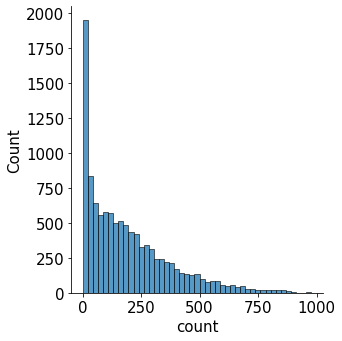

In [21]:
mpl.rc('font', size=15)    # 폰트 크기 15설정
sns.displot(train['count']); # 분포도 출력
# count가 0 인게 가장 높다

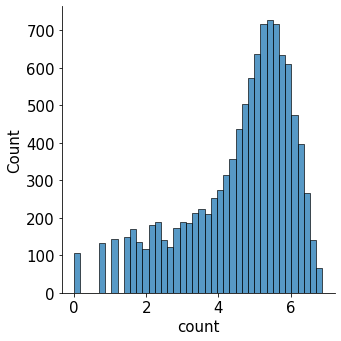

In [22]:
sns.displot(np.log(train['count']));

# 0값이 너무 높아서 log_scaling을 해준다

# countplot 활용

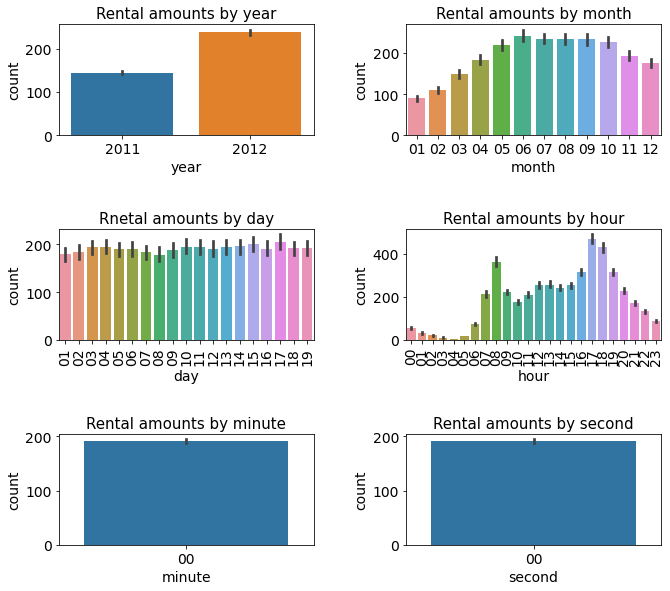

In [23]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax= axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute',y='count',data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

axes[0,0].set(title = 'Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title = 'Rnetal amounts by day')
axes[1,1].set(title = 'Rental amounts by hour')
axes[2,0].set(title = 'Rental amounts by minute')
axes[2,1].set(title = 'Rental amounts by second')

axes[1,0].tick_params(axis='x', labelrotation = 90)
axes[1,1].tick_params(axis='x', labelrotation = 90)

2011년보다 2012년이 더 많이 탔다
여름과 가을에 가장 많이 대여했다
day, minute, second는 별로 의미가 없어 보인다
시간대는 주로 아침 출근시간대와 저녁 퇴근시간대에 가장 많이 대여했다

박스플롯

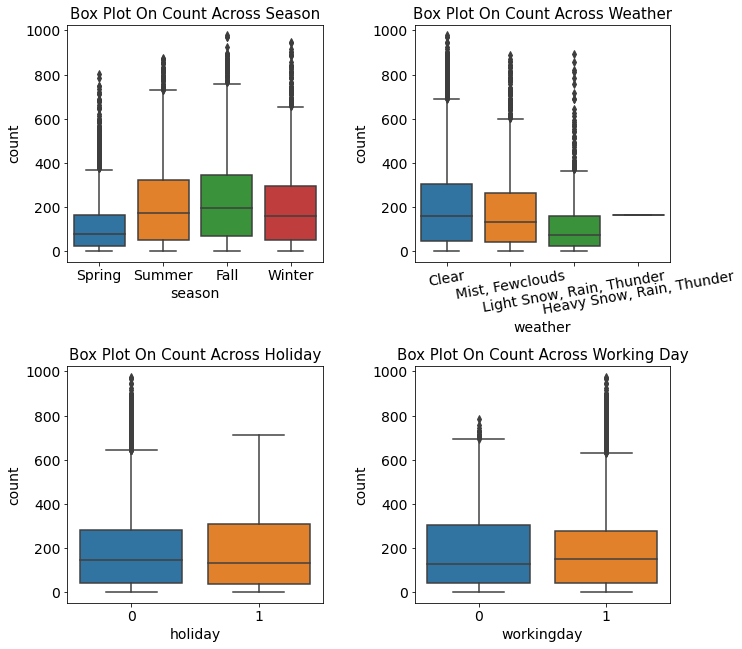

In [24]:
figure, axes = plt.subplots(nrows=2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count',data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Working Day')

axes[0,1].tick_params('x',labelrotation=10)

여름과 가을에 가장 많이 대여를 했다
날씨가 맑을수록 많이 대여를 했고 비오는 날은 대여를 하지 않았다
의외로 주말과 평일엔 별로 차이가 없다

포인트 플롯

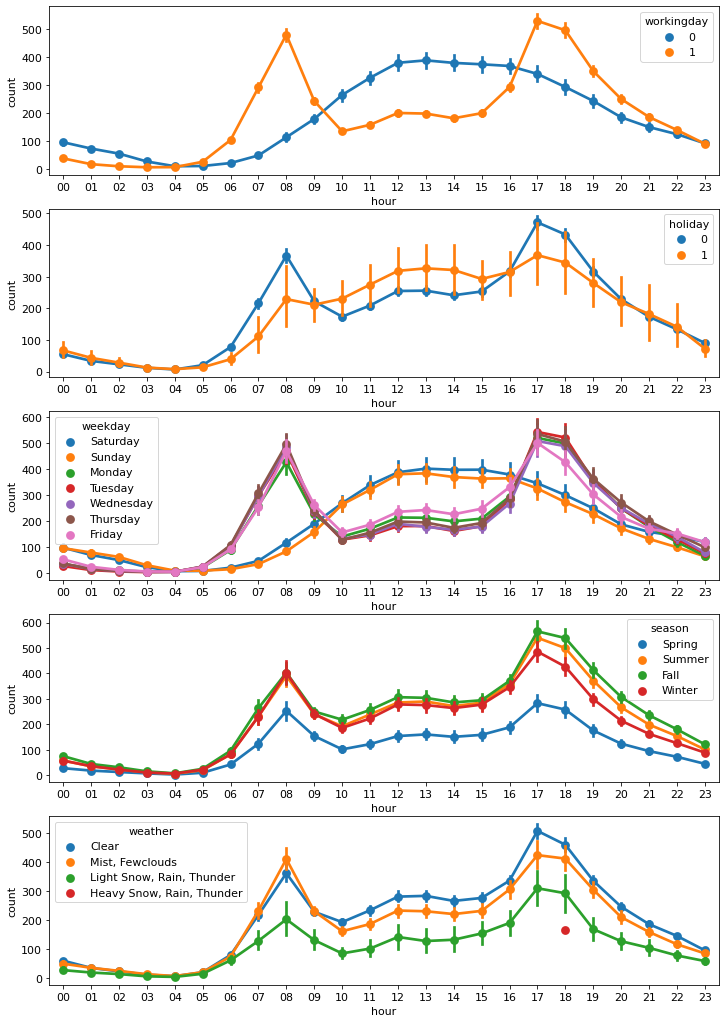

In [25]:
mpl.rc('font', size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12,18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday',ax=axes[0])
sns.pointplot(x='hour',y='count',data=train, hue='holiday',ax=axes[1])
sns.pointplot(x='hour',y='count',data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour',y='count',data=train, hue ='season',ax=axes[3])
sns.pointplot(x='hour', y='count',data=train, hue='weather',ax=axes[4]);

평일엔 출근시간 퇴근시간에만 대여가 높고 나머진 낮다  
주말엔 점심시간부터 저녁시간 사이가 높다


회귀선을 포함한 산점도 그래프

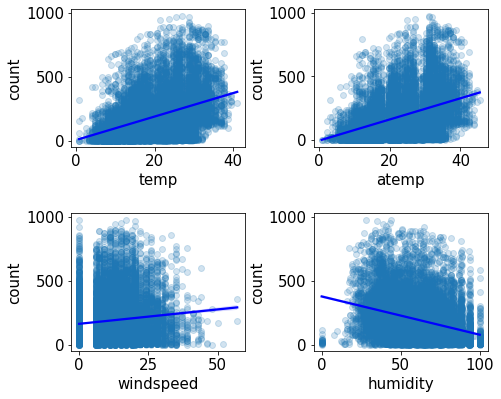

In [26]:
mpl.rc('font',size = 15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='temp',y='count', data=train, ax=axes[0,0], scatter_kws={'alpha' :0.2},line_kws = {'color': 'blue'})
sns.regplot(x='atemp',y='count', data=train, ax=axes[0,1], scatter_kws={'alpha': 0.2},line_kws = {'color': 'blue'})
sns.regplot(x='windspeed',y='count', data=train, ax=axes[1,0], scatter_kws={'alpha': 0.2},line_kws = {'color': 'blue'})
sns.regplot(x='humidity',y='count', data=train, ax=axes[1,1], scatter_kws={'alpha': 0.2},line_kws = {'color': 'blue'})

히트맵

In [27]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

# corr() : 각 열간의 상관관계
# 보기 어렵기 때문에 히트맵으로 본다

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

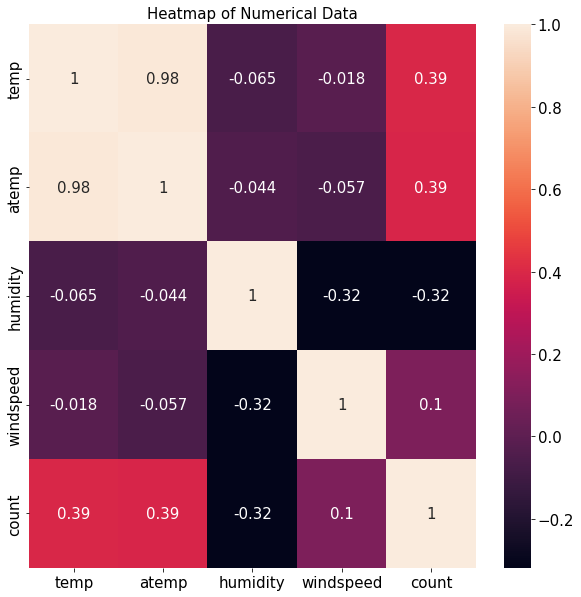

In [28]:
# 피쳐 간 상관관계 매트릭스

corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data')

체감온도와 온도에 상관관계가 있다

# 2. 자전거 대여 수요 예측 경진대회 베이스라인 모델

In [29]:
import pandas as pd

data_path = 'content/bike-sharing-demand/'

train = pd.read_csv('/content/train.csv')
test = pd. read_csv('/content/test.csv')
submission = pd.read_csv('/content/sampleSubmission.csv')

## 2.1 피처 엔지니어링

이상치 제거

In [30]:
# 훈련데이터에서 weather 가 4가 아닌 데이터만 추출
train = train[train['weather'] !=4]

# 날씨가 가장 안좋은 4를 제외한다

In [31]:
all_data_temp = pd.concat([train, test])
all_data_temp

# all_data_temp에 트레인데이터와 테스트 데이터를 합쳐서 새로운 데이터셋을 만든다 
# => 17378개의 데이터이나 행인덱스를 재배열 하지 않아서 마지막 인덱스가 6492로 나온다

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [32]:
all_data = pd.concat([train, test], ignore_index = True)
all_data

# ignore_index = True ==> 행 인덱스를 재배열 한다
# 널값은 언제잡나?

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


파생 변수(피쳐)추가

In [33]:
from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[0])
all_data['hour'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[1].split(':')[0])

all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())

필요없는 피처 제거

In [34]:
drop_features = ['casual','registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_features, axis = 1)

# 칼럼 열데이터 제거하겠다

데이터 나누기

In [35]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값
# 내가 추가한 코드
X_train.isnull().values.any()

False

In [36]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,01,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,01,5
3,1,0,0,1,9.84,14.395,75,2011,01,5
4,1,0,0,1,9.84,14.395,75,2011,01,5


## 2.2 평가지표 계산 함수 작성

In [37]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

Root means square log error
회귀평가 지표로써 rmse에 로그를 취한것

## 2.3 모델 훈련

In [38]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [39]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

## 2.4 모델 성능 검증

In [40]:
preds = linear_reg_model.predict(X_train)

In [41]:
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.2033


## 2.5 예측 및 결과 제출

In [42]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('first_submission.csv', index=False) # 파일로 저장

# 3. 자전거 대여 수요 예측 경진대회 모델 성능 개선

In [43]:
import pandas as pd
# 데이터 경로
data_path = '/content'

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sampleSubmission.csv')

## 피쳐 엔지니어링

이상치 제거

In [44]:
train = train[train['weather'] != 4]

In [45]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

# 합친 데이터의 인덱스 정리

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


파생 변수(피쳐)추가

In [46]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

필요없는 피쳐 제거

In [47]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']
# 드랍시킬 데이터 리스트 작성
all_data = all_data.drop(drop_features, axis=1)
# 드랍

데이터 나누기

In [48]:
X_train = all_data[~pd.isnull(all_data['count'])]
# count 칼럼을 제외하고 트레인에 넣겠다??
X_test = all_data[pd.isnull(all_data['count'])]
# 훈련용과 테스트용으로 나눔
# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값



In [49]:
print(X_train)

       season  holiday  workingday  weather   temp   atemp  humidity  year  \
0           1        0           0        1   9.84  14.395        81  2011   
1           1        0           0        1   9.02  13.635        80  2011   
2           1        0           0        1   9.02  13.635        80  2011   
3           1        0           0        1   9.84  14.395        75  2011   
4           1        0           0        1   9.84  14.395        75  2011   
...       ...      ...         ...      ...    ...     ...       ...   ...   
10880       4        0           1        1  15.58  19.695        50  2012   
10881       4        0           1        1  14.76  17.425        57  2012   
10882       4        0           1        1  13.94  15.910        61  2012   
10883       4        0           1        1  13.94  17.425        61  2012   
10884       4        0           1        1  13.12  16.665        66  2012   

      hour  weekday  
0       00        5  
1       01        5

평가지표 계산 함수 작성

In [50]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

이해필요

# 성능 개선1 : 릿지 회귀모델

## 3.1.1 하이퍼 파라미터 최적화(모델 훈련)

모델생성

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

그리드 서치 객체 생성

In [52]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

그리드서치 수행

In [53]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [54]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


## 3.1.2 성능검증

In [55]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 
# 릿지 모델로 예측

print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 1.0205


# 3.2 성능개선2 :라쏘 회귀 모델

## 3.2.1 하이퍼 파라미터 최적화(모델훈련)

In [56]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params, 
                                      scoring=rmsle_scorer, 
                                      cv=5)

# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)
# 최적의 파라미터 골라준다

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


## 3.2.2 성능검증

In [57]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


# 3.3 성능개선3 : 랜덤 포레스트 회귀모델

## 3.3.1 하이퍼 파라미터 최적화(모델훈련)

In [58]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140, 160, 180, 200]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 160, 'random_state': 42}


## 3.3.2 모델 성능 검증

In [59]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1124


## 3.3.3 예측 및 결과 제출

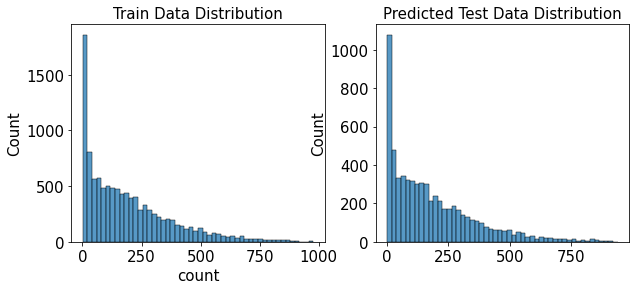

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [61]:
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('second_submission.csv', index=False)